In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

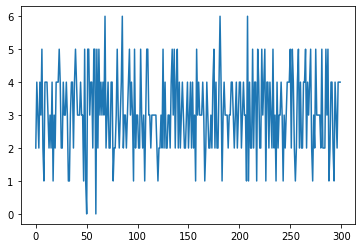

In [17]:
scores = np.random.rand(6,300)
threshold = 0.5

def decode_str2list(s):
    """
    s = "[(65.03, 77.31), (81.02, 87.02), (186.22, 197.14)]"
    """
    s = s[1:-1]
    res = []
    if not s:
        # print(res)
        return res
    s_list = s.split(',')
    for i, tup in enumerate(s_list):
        tup = tup.strip().strip('(').strip(')')
        if not i%2:
            start = float(tup)
        else:
            res.append((start,float(tup)))
    # print(res)
    return res

def plot_distributed(scores, threshold):
    count = [0 for i in range(scores.shape[1])]

    for i in range(scores.shape[0]):
        for j in range(scores.shape[1]):
            if scores[i][j] > threshold:
                count[j] += 1

    plt.figure()
    plt.plot(range(len(count)),count)
    plt.show()

plot_distributed(scores,threshold)

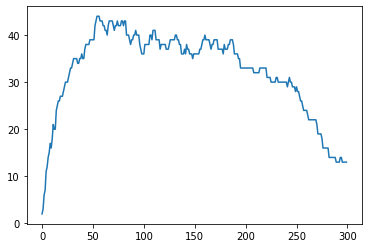

In [19]:
GTs = pd.read_csv('data/frame_level_annotations/temporal_labels_v2.csv',encoding='gbk')
gt_labels = []
for k, v in enumerate(list(GTs['video_name'])):
    gt_labels.append(decode_str2list(GTs['segments_frame'][k]))

GT_scores = []
for vid in gt_labels:
    tmp = [0]*300
    for tup in vid:
        if tup[0]>6000:
            break
        start,end = int(tup[0]/20),int(min(6000,tup[1])/20)
        for i in range(start,end):
            tmp[i] = 1
    GT_scores.append(tmp)

GT_scores = np.array(GT_scores)
# np.save('gt_distri.npy', GT_scores)

plot_distributed(GT_scores,threshold)

In [13]:
import numpy as np

ap = []
tmp = np.zeros(5)
tmp[0] = 0
tmp[1] = 1
tmp[2] = 2
tmp[3] = 3
tmp[4] = 4
ap.append(tmp)
# tmp = np.zeros(5)
# tmp[0] = 2
# tmp[1] = 4
# tmp[2] = 6
# tmp[3] = 8
# tmp[4] = 10
# ap.append(tmp)
# ap = np.array(ap)
# print(ap.shape)
print(ap)
print(np.mean(ap, axis=0)*100)

[array([0., 1., 2., 3., 4.])]
[  0. 100. 200. 300. 400.]
(5,)
